In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Balodi\Desktop\DATASET\Admission_Prediction.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [5]:
df.drop('Serial No.',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          485 non-null    float64
 1   TOEFL Score        490 non-null    float64
 2   University Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
df.shape

(500, 8)

# Checking for Null Values

In [9]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [10]:
# Handle the null values

In [11]:
df.isnull().mean()

GRE Score            0.03
TOEFL Score          0.02
University Rating    0.03
SOP                  0.00
LOR                  0.00
CGPA                 0.00
Research             0.00
Chance of Admit      0.00
dtype: float64

In [12]:
for var in df:
    value = df[var].mean()
    df[var] = df[var].fillna(value)

In [13]:
df.isnull().mean()

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [14]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Checking for Outliers

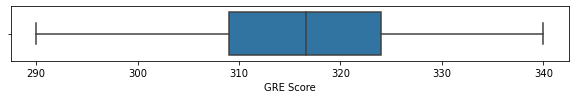

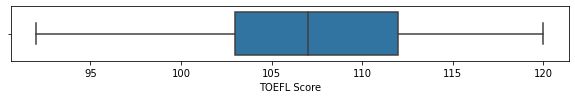

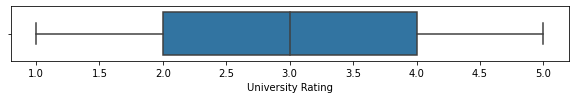

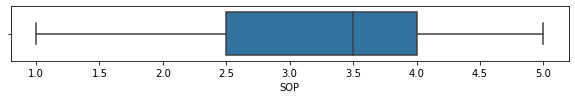

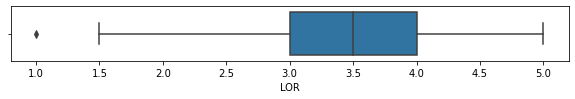

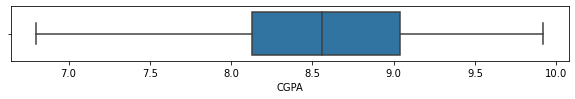

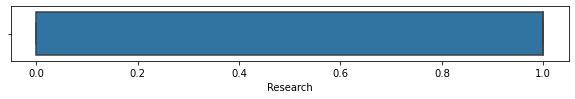

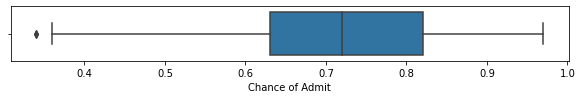

In [15]:
for column in df:
        plt.figure(figsize=(10,1))
        sns.boxplot(data=df, x=column)


In [16]:
# observation ...
# the number of outliers is very less.

# Data Visualizatiion

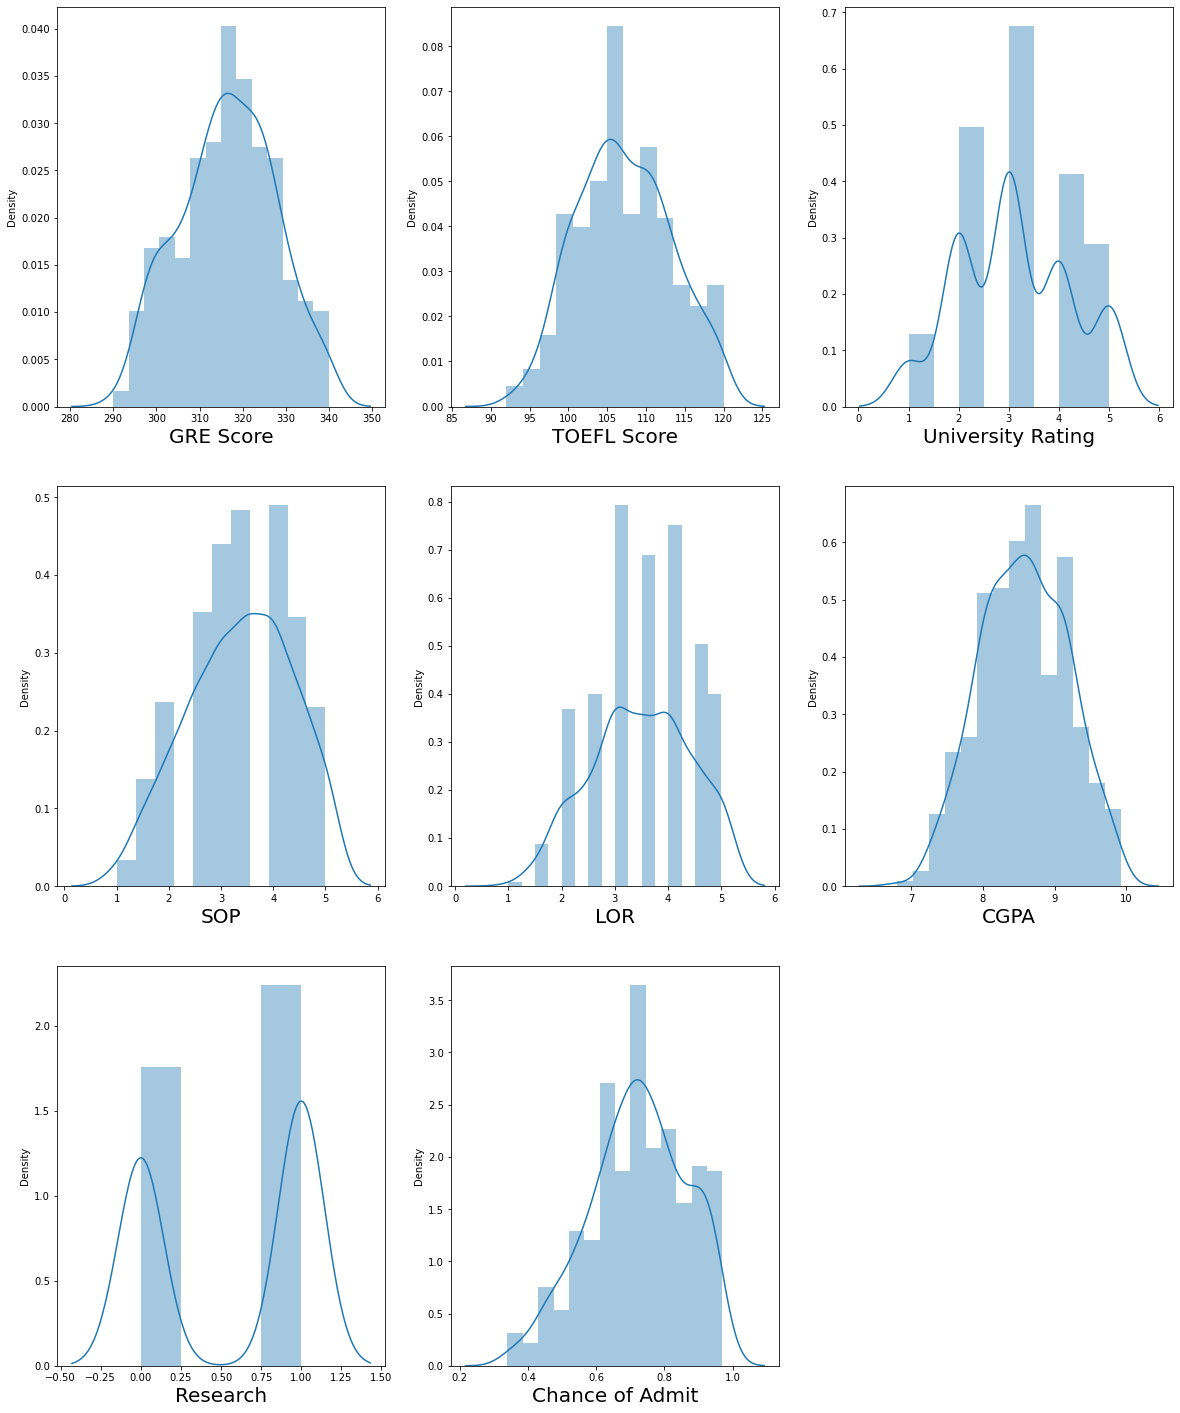

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [19]:
corr = round(df.corr(),2)

In [20]:
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.00,0.82,0.62,0.61,0.53,0.82,0.54,0.80
TOEFL Score,0.82,1.00,0.64,0.64,0.54,0.81,0.46,0.79
University Rating,0.62,0.64,1.00,0.71,0.61,0.70,0.42,0.68
SOP,0.61,0.64,0.71,1.00,0.66,0.71,0.41,0.68
LOR,0.53,0.54,0.61,0.66,1.00,0.64,0.37,0.65
CGPA,0.82,0.81,0.70,0.71,0.64,1.00,0.50,0.88
Research,0.54,0.46,0.42,0.41,0.37,0.50,1.00,0.55
Chance of Admit,0.80,0.79,0.68,0.68,0.65,0.88,0.55,1.00


<AxesSubplot:>

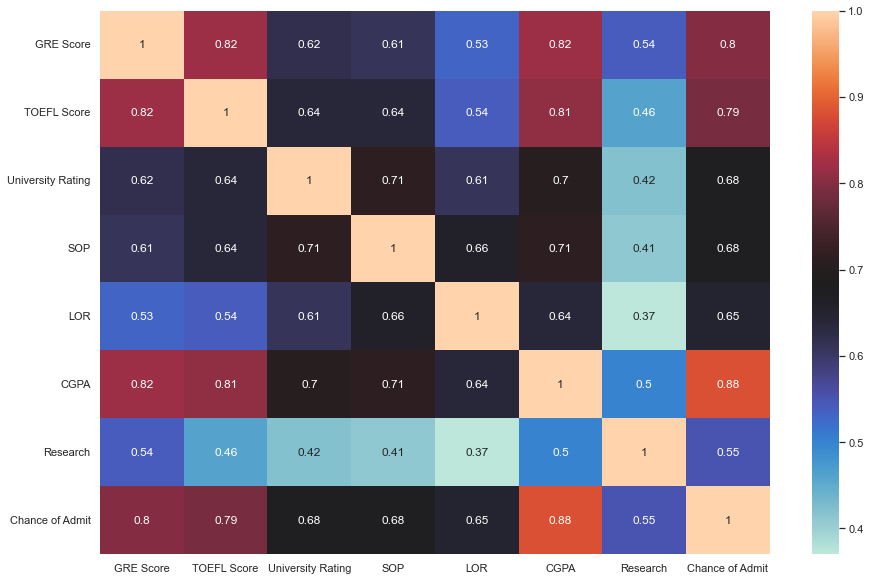

In [21]:
## ploting heatmap for visualizaion the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True ,cmap='icefire')

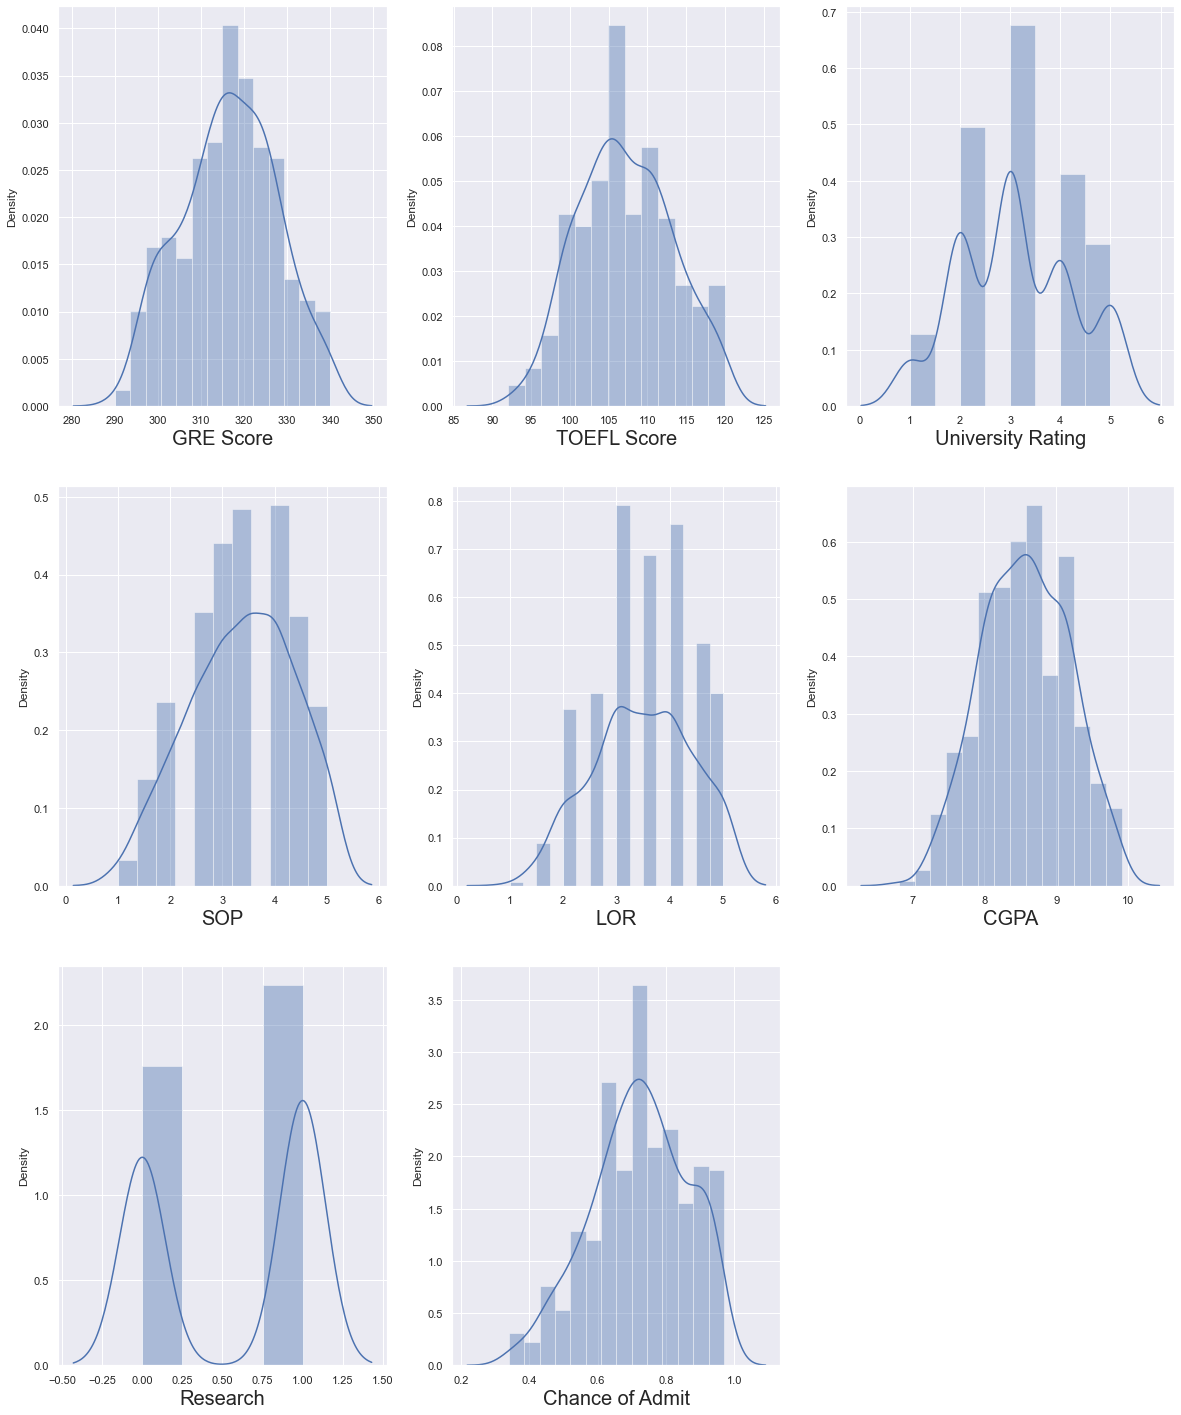

In [22]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## splitting data into independet and dependent features

In [23]:
x = df.iloc[:,:-1]

In [24]:
y = df.iloc[:,-1]

In [25]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [26]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

# Train Test split

In [27]:
## random state train test split ....
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state=10)
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
324,315.000000,104.0,3.0,3.0,2.5,8.33,0
252,318.000000,100.0,2.0,2.5,3.5,8.54,1
441,332.000000,112.0,1.0,1.5,3.0,8.66,1
427,310.000000,101.0,3.0,3.5,5.0,8.65,1
70,316.558763,118.0,5.0,5.0,5.0,9.64,1


In [28]:
y_train.head()

324    0.67
252    0.71
441    0.79
427    0.71
70     0.94
Name: Chance of Admit, dtype: float64

In [29]:
x_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
151,332.0,116.0,5.0,5.0,5.0,9.28,1
424,325.0,114.0,5.0,4.0,5.0,9.46,1
154,326.0,108.0,3.0,3.0,3.5,8.89,0
190,324.0,111.0,5.0,4.5,4.0,9.16,1
131,303.0,105.0,5.0,5.0,4.5,8.65,0


In [30]:
y_test.head()

151    0.94
424    0.91
154    0.80
190    0.90
131    0.77
Name: Chance of Admit, dtype: float64

In [31]:
## shape 
x_train.shape,y_train.shape

((375, 7), (375,))

In [32]:
x_test.shape,y_test.shape

((125, 7), (125,))

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler

StandardScaler()

In [36]:
x_train =scaler.fit_transform(x_train)
x_train

array([[-0.1143013 , -0.50693301, -0.05779804, ..., -1.00222248,
        -0.36783128, -1.13427746],
       [ 0.15313402, -1.16692955, -0.94391609, ...,  0.07005549,
        -0.0297116 ,  0.8816185 ],
       [ 1.40116551,  0.81306006, -1.83003414, ..., -0.46608349,
         0.16349965,  0.8816185 ],
       ...,
       [ 0.06398891, -0.17693474, -0.05779804, ..., -0.46608349,
        -1.07627251,  0.8816185 ],
       [-1.4514779 , -1.16692955, -0.05779804, ..., -0.46608349,
         0.16349965,  0.8816185 ],
       [-0.29259152, -0.83693128, -0.05779804, ..., -1.00222248,
         0.19570152, -1.13427746]])

In [37]:
x_test=scaler.transform(x_test)
x_test

array([[ 1.40116551,  1.4730566 ,  1.71443806,  1.66146257,  1.67847246,
         1.16175776,  0.8816185 ],
       [ 0.77714976,  1.14305833,  1.71443806,  0.66378689,  1.67847246,
         1.45157463,  0.8816185 ],
       [ 0.86629487,  0.15306352, -0.05779804, -0.3338888 ,  0.07005549,
         0.53382121, -1.13427746],
       [ 0.68800465,  0.64806093,  1.71443806,  1.16262473,  0.60619448,
         0.96854651,  0.8816185 ],
       [-1.18404258, -0.34193388,  1.71443806,  1.66146257,  1.14233347,
         0.14739871, -1.13427746],
       [ 0.33142423, -0.50693301, -0.05779804, -0.3338888 ,  0.07005549,
         0.29230715,  0.8816185 ],
       [-0.38173662, -0.34193388, -0.94391609, -1.33156448, -1.00222248,
        -0.17462003, -1.13427746],
       [ 1.40116551,  0.15306352,  1.71443806,  1.16262473,  0.60619448,
         0.74313339,  0.8816185 ],
       [-0.64917194, -0.50693301, -0.94391609, -1.33156448, -1.00222248,
        -0.48053784, -1.13427746],
       [-0.38173662, -0.1769

# SVR model

In [50]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(x_train,y_train)

SVR()

In [51]:
y_pred = classifier.predict(x_test)

In [52]:
y_pred

array([0.87234133, 0.86934633, 0.64751697, 0.85463473, 0.71873343,
       0.7574658 , 0.64852762, 0.83184479, 0.60784643, 0.75120955,
       0.88376334, 0.81599255, 0.85019328, 0.6795525 , 0.79545578,
       0.74722909, 0.70664855, 0.74947544, 0.74033017, 0.6203719 ,
       0.74236635, 0.615467  , 0.60239865, 0.86779459, 0.48749493,
       0.87535131, 0.73111588, 0.49242435, 0.66004377, 0.667752  ,
       0.88292144, 0.75736122, 0.60164091, 0.66202243, 0.71975754,
       0.87248276, 0.81433978, 0.65935659, 0.65521888, 0.70049441,
       0.87634836, 0.59787024, 0.70141631, 0.88030402, 0.85781971,
       0.49161824, 0.54224932, 0.65512095, 0.77772565, 0.73067984,
       0.7893961 , 0.68258628, 0.55016519, 0.60471124, 0.64992877,
       0.79342732, 0.84728581, 0.58127827, 0.68433085, 0.87731851,
       0.60776197, 0.83172632, 0.73844605, 0.50650887, 0.83554994,
       0.50019584, 0.70154821, 0.7256335 , 0.50436728, 0.6994849 ,
       0.90405181, 0.55502231, 0.56259194, 0.7349586 , 0.69689

In [59]:
# Performance matrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [61]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


0.004119457724873739
0.049853307547720084


In [62]:
# R-square & Adjusted R-squared
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
print(score)

0.7623172714930317


In [63]:
## Adjuste r2 
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7480969373088542